# Aviation Crash Data Analysis 

<center><img src="./images/Header.png" 
    Width="1000">

## 1. Business Understanding 

### 1.1. Business Objective
This project analyzes the [aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) on Kaggle. The findings will be used to make recommendations to stakeholders that may be looking to expand their business through purchasing and operating airplanes for commercial and private enterprises. 

### 1.2. Background Information
Before proceeding any further, we do some research to gain some domain knowledge. Different measures could be considered for assessing the safety of aircrafts. For example, the *number of fatal crashes per every 100,000 flights* seems like a standard measure to consider. The *number of non-fatal incidents that led to injuries* or required the pilot to take extreme measures for landing the aircraft may be considered as a secondary measure [REF](https://assets.performance.gov/APG/files/2023/june/FY2023_June_DOT_Progress_Aviation_Safety.pdf).

Some aspects of safety we can investigate are: 
- aircraft make and model: certain models may be more susciptible to incidents due to inherent manufacturing/design flaws.
- number of engines: a 4-engine aircraft should be safer compared to a 2-engine one
- location: mountanous regions or locations with extreme weather conditions could be more accident-prone.
- manufacturer's safety compliance policies: quantifiable metrics such as the frequency of inspections could be studied provided that the data is available.

### 1.3. Data Mining Goals
A successful mining of the data would determine potentail factors that affect the safety of aircrafts. The correlation of each factor to aircraft safety and the strength of such correlation will provide insights to identify the lowest-risk aircrafts that the client can start its business endeavor with. 

### 1.4. Project Plan
We will first skim the data provided to get a preliminary understanding of what's available, whether it's clean and ready for use. Next, we will determine the useful data for our analysis. This portion of the data will be prepared, cleaned and organized. In the end, we will use insights from the data along with visualizations to make appropriate business recommendations. As a complementary part, limitations of the work along with potential future investigations will be highlighted.   

## 2. Data Understanding

In this section, we take a first look at the data to get a preliminary understanding of its type and what it contains. 

In [135]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

### 2.1. Data Description
We use the [aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) available on Kaggle.

In [136]:
# read the data 
df = pd.read_csv("./data/Aviation_Data.csv",low_memory=False)
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [142]:
print(f"The data has {len(df)} rows and {len(df.columns)} columns.")

The data has 90348 rows and 31 columns.


Let's take a look at some statistics for the numerical data: 

In [146]:
df.describe()

,Number_of_engines,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### 2.2. Improving Aesthetics/Readability

In [147]:
# replace . with _ in columns names to increase readability/facilitate use of column names 
df.rename(columns=lambda x: x.replace('.','_'),inplace=True)
# standardize the capitalization of column names
df.columns = [column.capitalize() for column in df.columns]
df.rename(columns={"Far_description": "FAR_description"},inplace=True)

In [148]:
# taking a peak at a few rows of the data
pd.set_option('display.max_columns', None)
df.head(5)

,Event_id,Investigation_type,Accident_number,Event_date,Location,Country,Latitude,Longitude,Airport_code,Airport_name,Injury_severity,Aircraft_damage,Aircraft_category,Registration_number,Make,Model,Amateur_built,Number_of_engines,Engine_type,FAR_description,Schedule,Purpose_of_flight,Air_carrier,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition,Broad_phase_of_flight,Report_status,Publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 2.3. Improve Understanding of the Data

In [149]:
# Take a look at some of the categorical data you don't fully understand
print('Categorical data for Broad phase of flight:')
print(df["Broad_phase_of_flight"].unique(),'\n')

print('Categorical data for FAR description:')
print(df["FAR_description"].unique(),'\n')

print('Categorical data for Engine type:')
print(df["Engine_type"].unique())

Categorical data for Broad phase of flight:
['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan] 

Categorical data for FAR description:
[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107'] 

Categorical data for Engine type:
['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']


**Important Notes:**
- The data has 31 columns. There are two data types: object (string/text) and float. We note that the float data type seems appropriate for the columns listed (i.e., number of engines, total fatal/serious/minor injuries, and total uninjured). An int type may be more appropriate for these categories but changing the data type might introduce unwanted issues when performing statistical analysis so we will keep it as is for now. 
- Notice that some columns have substantial amount of missing data. We will address this in more detail in the next sections (Data Preparation and EDA).
- I took some time to make sure I understand what each column represents and brainstorm whether it can be leveraged for the type of analysis we're doing. Below, I will include explanation on a number of items that were not clear to me:
    - **Investigation type:** incident vs. accident. Incidents refer to occurrences that do not result in signifcant damage to the aircraft.
    - **Weather condition:** IMC (Instrument Meteorological Conditions) and VMC (Visual Meteorological Conditions). The former is associated with reduced visibility while the latter usually corresponds to clear skies. 
    - **FAR description:** Represents descriptions or codes that specify which specific Federal Aviation Regulations are relevant to each accident. Recurrent FAR violations in certain categories (such as maintenance) can be raise red flags for aviation companies.
    - **Engine type:** includes reciprocating, turbo jet, etc. Engine type has been documented to have an effect with aircraft safety [REF](https://dk.upce.cz/bitstream/handle/10195/74791/Use_of_Aircraft_Engine_Type_and_Quantity_and_their_Impact_on_Air_Transport_Safety.pdf?sequence=1&isAllowed=y).
    - **Broad phase of flight:** indicates the phase of flight at which the accident or incident happened. Includes categorical data such as "Cruise", "Taxi", etc. This may be useful for identifying risks associated with each phase of flight, but may not be necessarily relevant to our analysis.
    - **Report status:** This item shows whether the report on the accident is at its final stage or it's developing.

### 2.4. Summary: 
- The data has **90348** rows and **31** columns.
- The categorical and numerical data included are relevant to answer the question we're after.
- Based on what was discussed above, the following features will be of interest for our analysis: event date, investigation type, location, country, injury severity, aircraft damage, aircraft category, make, model, number of engines, engine type, FAR description, air carrier, total injuries and total fatal/serious/minor injuries, total uninjured, and weather condition.
- The preliminary look at the data shows that some of the important columns have several NaNs and missin

## Data Preparation

**Fixing Data Types:**
We start by changing the data type for the event date. The event date is of importance since trends and patterns in aviation accidents may be time-dependent (e.g. a company with high number of accidents in the past may have become a reliable aviation company later on). 

In [100]:
df.Event_date = pd.to_datetime(df.Event_date)

In [101]:
# check for the percentage of missing data in each category
df.isna().sum()/len(df)*100

Event_id                   1.614867
Investigation_type         0.000000
Accident_number            1.614867
Event_date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport_code              44.512330
Airport_name              41.665560
Injury_severity            2.721698
Aircraft_damage            5.150086
Aircraft_category         64.263736
Registration_number        3.144508
Make                       1.684597
Model                      1.716695
Amateur_built              1.727764
Number_of_engines          8.348829
Engine_type                9.468942
FAR_description           64.555939
Schedule                  86.073848
Purpose_of_flight          8.468367
Air_carrier               81.573471
Total_fatal_injuries      14.233851
Total_serious_injuries    15.461327
Total_minor_injuries      14.822686
Total_uninjured            8.158454
Weather_condition          6

We can see that several categories have a lot of missing data (over 50%). Among the data we said we care about in the previous section, "FAR_description", "Aircraft_category" and "Air_carrier" are also part of the categories with a high percentage of missing data. We need to make a decision about how we will handle the missing portion of the data. We can either drop the rows and/or columns or replace the missing data with the most frequent category. Dropping the rows or replacing them is not a good option since we would be throwing away a lot of data. The best option is to drop all columns that have more missing data than a certain threshold value. We assume this **threshold value** to be **30%**. Dropping "Aircraft_category" and "Air_carrier" may seem like a bad idea but we have the "Make" and "Model" columns to rely on. 

In [102]:
# drop columns with more than 30% of missing rows. 
df.dropna(axis=1,thresh=np.round(0.7*len(df)),inplace=True)

We also notice that some of the columns contain data that's not required for our analysis. We will drop those columns and only keep the ones we need: Event_date, Location, Country, Injury_severity, Make, Model, Number_of_engines, Engine_type, Total_fatal_injuries, Total_serious_injuries, Total_minor_injuries, Total_uninjured, Weather_condition.

In [103]:
cols_to_keep = ["Event_date", "Location", "Country", "Injury_severity", "Make", "Model", "Number_of_engines", "Engine_type", "Total_fatal_injuries", "Total_serious_injuries", "Total_minor_injuries", "Total_uninjured", "Weather_condition"]
df_subset=df[cols_to_keep];
df_subset.head()

,Event_date,Location,Country,Injury_severity,Make,Model,Number_of_engines,Engine_type,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC


We note that the "Injury_severity" column is storing the count for fatal injuries inside a paranthesis in front of the mtype of injury. This is inconvenient since if we use groupby, fatal injuries of different kinds will be treated as different categories while they're all actually one category. We fix this as follows:

In [104]:
df_subset["Injury_severity"]=df_subset["Injury_severity"].str.split('(').str[0]
df_subset.head()

C:\Users\setar\AppData\Local\Temp\ipykernel_17232\2247802715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Injury_severity"]=df_subset["Injury_severity"].str.split('(').str[0]


,Event_date,Location,Country,Injury_severity,Make,Model,Number_of_engines,Engine_type,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,"Saltville, VA",United States,Fatal,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,"EUREKA, CA",United States,Fatal,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,"Canton, OH",United States,Fatal,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC


We note that there are some unknown values in the several of the columns that are technically nans. We attempt to convert these to nans and check the amount of missing data in this column again. 

In [105]:
str_to_nan = ['UNK','Unk','Unknown']
df_subset=df_subset.applymap(lambda x: np.nan if x in str_to_nan else x)
df_subset.isna().sum()/len(df)*100

C:\Users\setar\AppData\Local\Temp\ipykernel_17232\3862996511.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_subset=df_subset.applymap(lambda x: np.nan if x in str_to_nan else x)


Event_date                 1.614867
Location                   1.673529
Country                    1.868331
Injury_severity            2.721698
Make                       1.707841
Model                      1.721123
Number_of_engines          8.348829
Engine_type               11.740160
Total_fatal_injuries      14.233851
Total_serious_injuries    15.461327
Total_minor_injuries      14.822686
Total_uninjured            8.158454
Weather_condition          7.824191
dtype: float64

We note that the remaining data does not have much missing values (a maximum of 15% among columns). We choose to drop these rows to get clean data we can easily work with.

In [106]:
df_subset.dropna(axis=0,inplace=True)
#df_subset.head()

Let's take a look at the length of this dataset compared to the original one to make sure we haven't ommitted a significant amount of data. 

In [107]:
print("The percentage of retained data is:", len(df_subset)/len(df)*100)

The percentage of retained data is: 71.34081551334839


In [108]:
df_subset.isna().sum()

Event_date                0
Location                  0
Country                   0
Injury_severity           0
Make                      0
Model                     0
Number_of_engines         0
Engine_type               0
Total_fatal_injuries      0
Total_serious_injuries    0
Total_minor_injuries      0
Total_uninjured           0
Weather_condition         0
dtype: int64

Let's take a look at the Country column and see how much data we have on each country. 

In [109]:
df_subset['Country'].value_counts()
print(df_subset['Country'].value_counts().max()/len(df_subset))

0.9899309595842061


Data from the US comprises 98% of the data. This is a huge portion. Data entries from other countries may not be enough for making a good decision. Therefore, we will drop any rows with data on countries other than the US. We will also change the Location column such that it only contains the abbreviation for the name of the state. 

In [110]:
df_subset = df_subset[df_subset["Country"]=="United States"]
df_subset["Location"]=df_subset["Location"].str.split(',').str[1]
#df_subset['Location'].value_counts()

We will assume that the sum of the "Total_fatal_injuries", "Total_serious_injuries", "Total_minor_injuries" and "Total_uninjured" gives the number of people unboard. We will add 3 columns to the dataframe that shows that percentage of injuries for the number of people onboard instead of just absolute numbers. 

In [111]:
df_subset["Total_onboard"]=df_subset["Total_fatal_injuries"]+df_subset["Total_serious_injuries"]+df_subset["Total_minor_injuries"]+df_subset["Total_uninjured"]
df_subset["Total_fatal_injuries_ratio"]=df_subset["Total_fatal_injuries"]/df_subset["Total_onboard"]
df_subset["Total_serious_injuries_ratio"]=df_subset["Total_serious_injuries"]/df_subset["Total_onboard"]
df_subset["Total_minor_injuries_ratio"]=df_subset["Total_minor_injuries"]/df_subset["Total_onboard"]
df_subset["Total_uninjured_ratio"]=df_subset["Total_uninjured"]/df_subset["Total_onboard"]
#df_subset.tail(200)

In [112]:
#df_subset[(df_subset.Total_serious_injuries >0) & (df_subset.Total_fatal_injuries >0)]
bins = [0,5, 20, 150, df_subset["Total_onboard"].max()]
labels = ['Other','small aircraft', 'medium aircraft', 'large aircraft']

df_subset['Aircraft_size'] = pd.cut(df_subset['Total_onboard'], bins=bins, labels=labels, right=False)
#df_subset.head(50)
df_subset.Aircraft_size.value_counts().max()/len(df_subset)
#df[df["Purpose_of_flight"]=="Personal"].Make.value_counts().sort_index()

0.9370435382252452

In [113]:
pd.set_option('display.max_rows', None)
#df["Air_carrier"].unique()
df_subset["Total_fatal_injuries_ratio"].mean()
# month may matter.
# maybe we can make different categories based on total onboard for small, medium and large aircrafts
# maybe fill aircraft category based on Make & Model.  
# categorize based on injury severity to identify problematic make and models. 

0.16087090333509982

<Axes: ylabel='Frequency'>

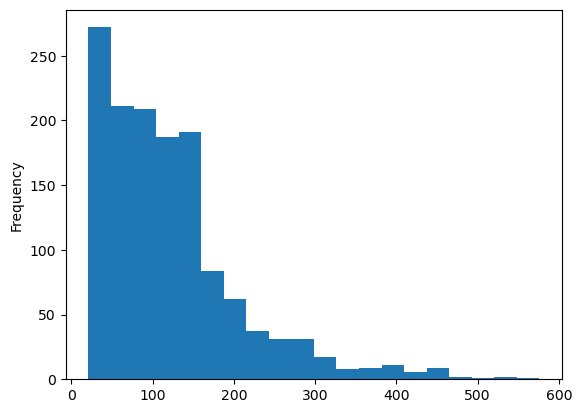

In [114]:
# categorize the size of the airplane based on the number of people onboard. 
df_subset[df_subset["Total_onboard"]>10]
df_subset[df_subset["Total_onboard"]>20]["Total_onboard"].plot(kind='hist',bins=20)

In [115]:
#df.groupby("Make").sum().Total_fatal_injuries.sort_values(ascending=False).plot(kind='bar')

## Explarotary Data Analysis (EDA)

In [116]:
df_subset['Location'].value_counts()
df_subset['Country'].value_counts()

Country
United States    63806
Name: count, dtype: int64

<Axes: xlabel='Location'>

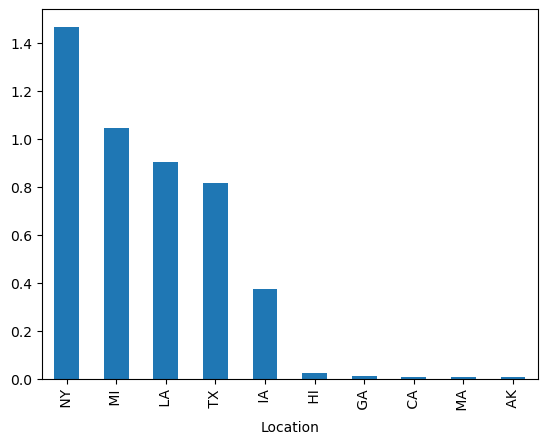

In [117]:
df_subset[df_subset["Aircraft_size"]=="large aircraft"].groupby('Location')['Total_fatal_injuries_ratio'].sum().sort_values(ascending=False).iloc[0:10].plot(kind="bar")

<Axes: xlabel='Engine_type'>

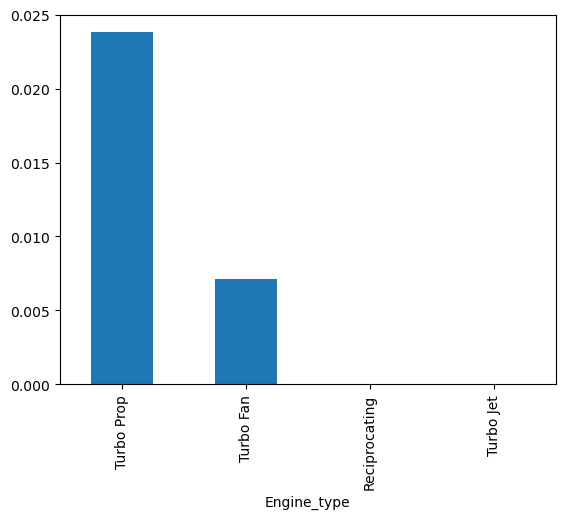

In [125]:
df_subset[(df_subset["Aircraft_size"]=="medium aircraft") & (df_subset["Event_date"].dt.year>2010)].groupby('Engine_type')['Total_fatal_injuries_ratio'].sum().sort_values(ascending=False).iloc[0:10].plot(kind='bar')


<Axes: xlabel='Event_date'>

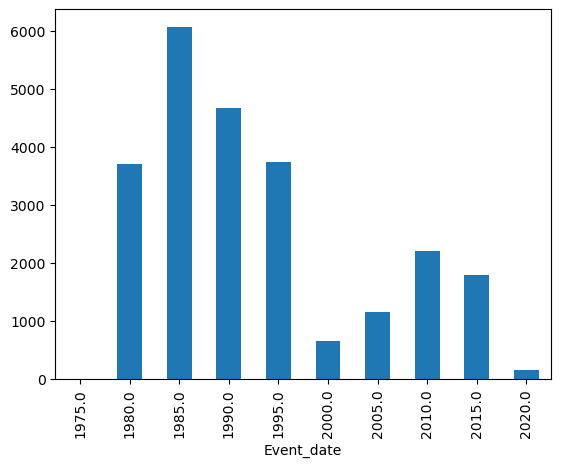

In [19]:
grouped_data = df_subset.groupby(df_subset['Event_date'] // 5 * 5).sum()
grouped_data["Total_fatal_injuries"].plot(kind='bar')

### Conclusion

### Limitations

## Recommendations

## Next Steps